<a href="https://colab.research.google.com/github/TraseRRR98/NYC-Taxi-Analysis-Lab/blob/main/BMCC_Data_Science_Challenge_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
api_url = "https://data.cityofnewyork.us/resource/jb7j-dtam.json"
result = requests.get(api_url)

In [ ]:
type(result)

requests.models.Response

In [ ]:
type(result.json())

list

In [ ]:
type(result.json()[0])

dict

In [ ]:
# let's check out the first result
result.json()[0]

{'year': '2014',
 'leading_cause': 'Malignant Neoplasms (Cancer: C00-C97)',
 'sex': 'M',
 'race_ethnicity': 'Asian and Pacific Islander',
 'deaths': '657',
 'death_rate': '114.5',
 'age_adjusted_death_rate': '129.5'}

In [ ]:
# pd.DataFrame can parse a list of JSON items/dicts
dr = pd.DataFrame.from_records(result.json())
dr.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Malignant Neoplasms (Cancer: C00-C97),M,Asian and Pacific Islander,657,114.5,129.5
1,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,258,19.2,16.4
2,2014,Alzheimer's Disease (G30),F,White Non-Hispanic,276,19.5,8.6
3,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4
4,2014,Septicemia (A40-A41),F,White Non-Hispanic,118,8.3,4.7


In [ ]:
# what time periods are in this dataset?
dr.year.unique()

array(['2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007'],
      dtype=object)

In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     1000 non-null   object
 1   leading_cause            1000 non-null   object
 2   sex                      1000 non-null   object
 3   race_ethnicity           1000 non-null   object
 4   deaths                   1000 non-null   object
 5   death_rate               1000 non-null   object
 6   age_adjusted_death_rate  1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
dr["death_rate"].value_counts()

death_rate
.        355
13         7
18         6
5.8        6
11.4       6
        ... 
28.2       1
61.6       1
21.3       1
310.3      1
102.5      1
Name: count, Length: 410, dtype: int64

In [ ]:
# convert to numeric
dr["year"] = pd.to_numeric(dr.year)

# convert to numeric
dr["death_rate"] = pd.to_numeric(dr.death_rate, errors="coerce")

# convert to numeric
dr["deaths"] = pd.to_numeric(dr.deaths, errors="coerce")

In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1000 non-null   int64  
 1   leading_cause            1000 non-null   object 
 2   sex                      1000 non-null   object 
 3   race_ethnicity           1000 non-null   object 
 4   deaths                   880 non-null    float64
 5   death_rate               645 non-null    float64
 6   age_adjusted_death_rate  1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


<Axes: xlabel='year', ylabel='Count'>

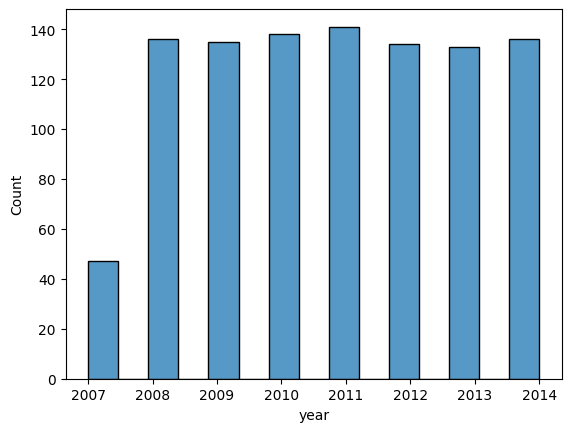

In [ ]:
# 1 What year has the most deaths and what year was the least deaths?

sns.histplot(dr.year, bins = 15)

<Axes: xlabel='year', ylabel='deaths'>

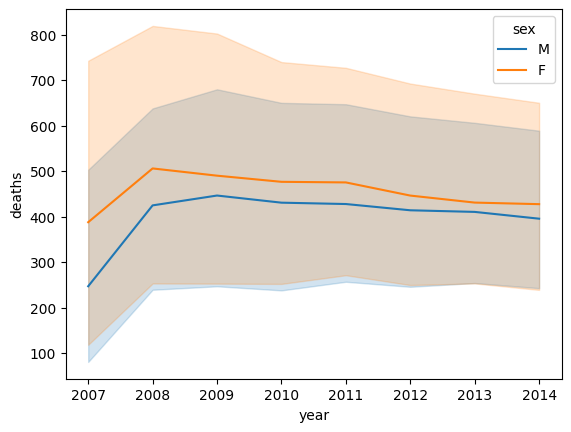

In [ ]:
# 2 What is the amount of deaths based of gender over time(from 2007 to 2014)?

sns.lineplot(data=dr, x="year", y="deaths", hue="sex")

In [ ]:
# dr.query("year.int64.contains('2011')")

dr2011 = dr.query("year == 2011")
dr2007 = dr.query("year == 2007")

In [ ]:
# 3 - What were the top 5 leading causes of death in 2011?
top5Causes2011 = dr2011.groupby("leading_cause")["deaths"].sum().sort_values(ascending=False).head(5).reset_index()
top5Causes2011

,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",16900.0
1,Malignant Neoplasms (Cancer: C00-C97),13438.0
2,All Other Causes,10387.0
3,Influenza (Flu) and Pneumonia (J09-J18),2491.0
4,Diabetes Mellitus (E10-E14),1770.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'),
  Text(1, 0, 'Malignant Neoplasms (Cancer: C00-C97)'),
  Text(2, 0, 'All Other Causes'),
  Text(3, 0, 'Influenza (Flu) and Pneumonia (J09-J18)'),
  Text(4, 0, 'Diabetes Mellitus (E10-E14)')])

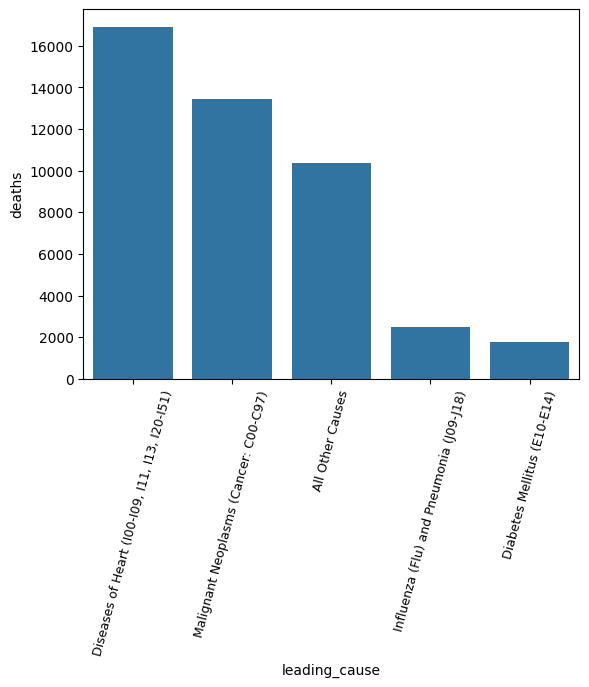

In [ ]:
sns.barplot(top5Causes2011, x="leading_cause", y="deaths")
plt.xticks(rotation=75, fontsize=9)

In [ ]:
# 4 - What were the top 5 leading causes of death in 2011?
raceD2011 = dr2011.groupby("race_ethnicity")["deaths"].sum().sort_values(ascending=False).head(5).reset_index()
raceD2011

,race_ethnicity,deaths
0,White Non-Hispanic,25549.0
1,Black Non-Hispanic,13910.0
2,Hispanic,9391.0
3,Asian and Pacific Islander,3341.0
4,Not Stated/Unknown,268.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'White Non-Hispanic'),
  Text(1, 0, 'Black Non-Hispanic'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Asian and Pacific Islander'),
  Text(4, 0, 'Not Stated/Unknown')])

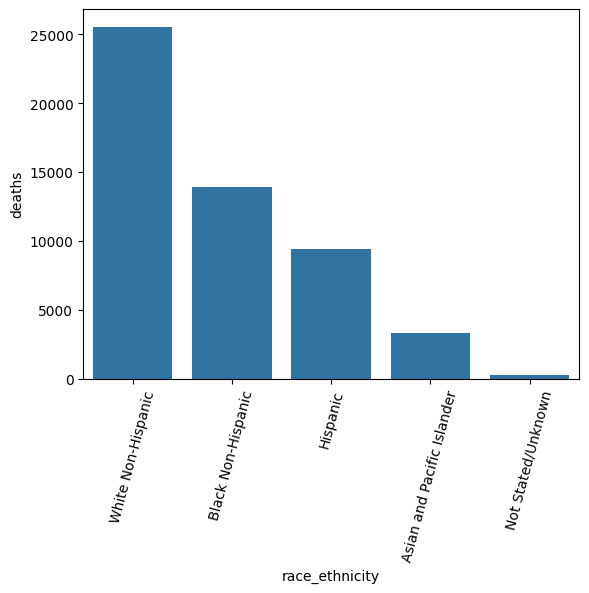

In [ ]:
sns.barplot(data=raceD2011, x="race_ethnicity", y="deaths")
plt.xticks(rotation=75)

In [ ]:
# 5 - What were the top 5 leading causes of death in 2007?
top5Causes2007 = dr2007.groupby("leading_cause")["deaths"].sum().sort_values(ascending=False).head(5).reset_index()
top5Causes2007

,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",5461.0
1,Malignant Neoplasms (Cancer: C00-C97),2357.0
2,All Other Causes,1296.0
3,Influenza (Flu) and Pneumonia (J09-J18),1119.0
4,Essential Hypertension and Renal Diseases (I10...,444.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'),
  Text(1, 0, 'Malignant Neoplasms (Cancer: C00-C97)'),
  Text(2, 0, 'All Other Causes'),
  Text(3, 0, 'Influenza (Flu) and Pneumonia (J09-J18)'),
  Text(4, 0, 'Essential Hypertension and Renal Diseases (I10, I12)')])

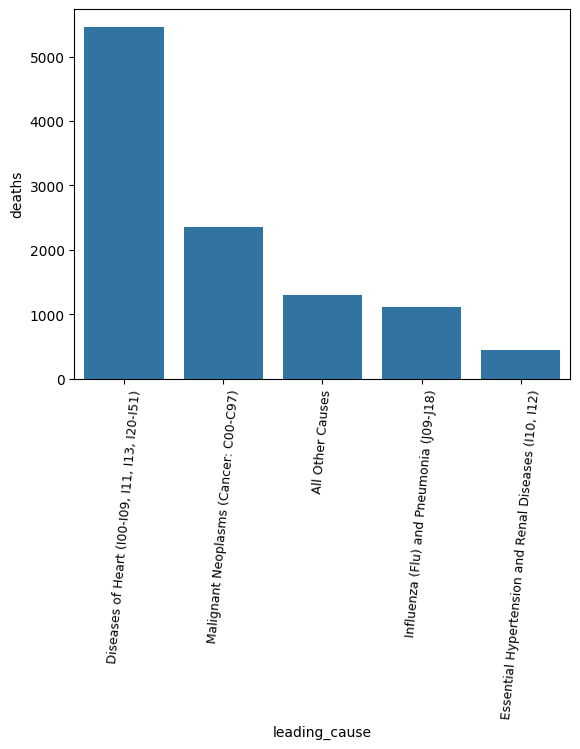

In [ ]:
sns.barplot(top5Causes2007, x="leading_cause", y="deaths")
plt.xticks(rotation=85, fontsize=9)

In [ ]:
# 2007 death rates by ethnicity

top5Causes2007 = dr2007.groupby("race_ethnicity")["deaths"].sum().sort_values(ascending=False).head(5).reset_index()
top5Causes2007

,race_ethnicity,deaths
0,Black Non-Hispanic,8976.0
1,White Non-Hispanic,1573.0
2,Asian and Pacific Islander,1317.0
3,Hispanic,312.0
4,Not Stated/Unknown,140.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Black Non-Hispanic'),
  Text(1, 0, 'White Non-Hispanic'),
  Text(2, 0, 'Asian and Pacific Islander'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Not Stated/Unknown')])

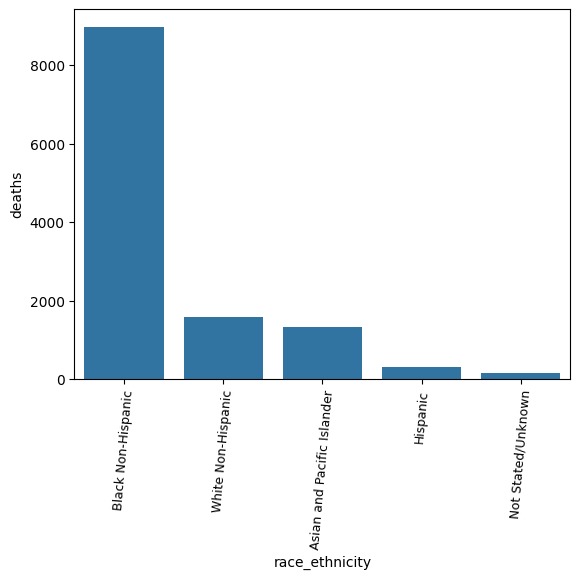

In [ ]:
sns.barplot(top5Causes2007, x="race_ethnicity", y="deaths")
plt.xticks(rotation=85, fontsize=9)

In [ ]:
#heart disease

#leading_cause = dr.query("leading_cause.str.contains('Diseases of Heart (I00-I09, I11, I13, I20-I51')")
leading_cause = dr.loc[dr['leading_cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)']


In [ ]:
leading_cause.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
18,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1281.0,107.3,170.5
32,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Asian and Pacific Islander,554.0,96.5,118.5
39,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Other Race/ Ethnicity,63.0,NaN,.
47,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Not Stated/Unknown,115.0,NaN,.
58,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4507.0,318.0,161


In [ ]:
leading_cause.year.unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007])

In [ ]:

heart = leading_cause.groupby("race_ethnicity")["deaths"].sum().sort_values(ascending = False).head(5).reset_index()
heart


,race_ethnicity,deaths
0,White Non-Hispanic,68878.0
1,Black Non-Hispanic,35222.0
2,Hispanic,18318.0
3,Asian and Pacific Islander,7081.0
4,Not Stated/Unknown,1378.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'White Non-Hispanic'),
  Text(1, 0, 'Black Non-Hispanic'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Asian and Pacific Islander'),
  Text(4, 0, 'Not Stated/Unknown')])

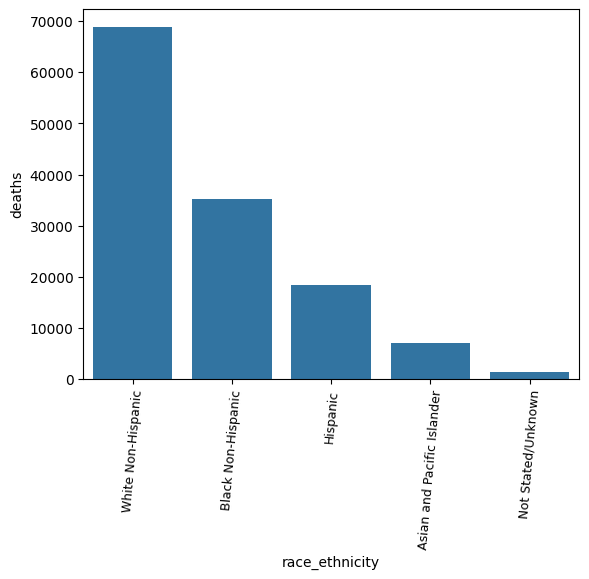

In [ ]:
sns.barplot(heart,x="race_ethnicity", y="deaths")
plt.xticks(rotation=85, fontsize=9)